In [79]:
from __future__ import print_function

from keras.preprocessing import sequence, image

from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Flatten
from keras.layers import LSTM, Conv2D, MaxPooling2D
from keras import backend as K
from collections import Counter
import os, sys
from nltk.tokenize import RegexpTokenizer
import numpy as np
import keras
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from PIL import Image, ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from sklearn.model_selection import train_test_split
%matplotlib inline 

In [80]:
batch_size = 32
num_classes = 2
epochs = 15

# input image dimensions
img_rows, img_cols = 80, 80

x = []
y = []

data_path = 'CatsDogs'

for fichier in os.listdir(data_path):
    if fichier.endswith(".jpg"):
        x.append(np.array(image.load_img(data_path + '/' + fichier, target_size=(img_rows, img_cols))))
        if fichier.startswith("dog"):
            y.append(1)
        if fichier.startswith("cat"):
            y.append(0)
            
x = np.array(x)
y = np.array(y)
# the data, split between train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33)
    
print("x_train shape :",x_train.shape)

x_train shape : (1340, 80, 80, 3)


0 (chat) / 1 (chien) : 1


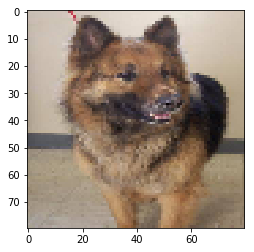

In [81]:
imshow(x_train[0])
print("0 (chat) / 1 (chien) :",y_train[0])

In [82]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')



x_train shape: (1340, 80, 80, 3)
1340 train samples
660 test samples


In [83]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]], dtype=float32)

### Réseau 1 (le même que pour MNIST)

In [86]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols,3))) 
model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) #prend la valeur max sur un carré de 2, stride = 2 par défaut donc dimension/2 qu'en entrée
model.add(Dropout(0.25)) #25% des poids forcés à 0
model.add(Flatten()) #on prend les cartes et on les met en vecteur
model.add(Dense(128, activation='relu')) #couche fully connected de 128 neurones (chaque neurone cablé à l'ensemble des entrées)
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #nombres de classes qu'on veut car sortie, softmax pour avoir une valeur homogène à une probabilité

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1340 samples, validate on 660 samples
Epoch 1/15
1340/1340 [==============================] - 41s 30ms/step - loss: 0.9200 - acc: 0.5015 - val_loss: 0.6801 - val_acc: 0.5348
Epoch 2/15
1340/1340 [==============================] - 40s 30ms/step - loss: 0.6810 - acc: 0.5560 - val_loss: 0.6989 - val_acc: 0.5394
Epoch 3/15
1340/1340 [==============================] - 44s 33ms/step - loss: 0.6788 - acc: 0.5873 - val_loss: 0.6589 - val_acc: 0.6955
Epoch 4/15
1340/1340 [==============================] - 41s 31ms/step - loss: 0.6443 - acc: 0.6485 - val_loss: 0.6486 - val_acc: 0.6470
Epoch 5/15
1340/1340 [==============================] - 42s 31ms/step - loss: 0.6135 - acc: 0.6694 - val_loss: 0.6267 - val_acc: 0.7015
Epoch 6/15
1340/1340 [==============================] - 40s 30ms/step - loss: 0.5578 - acc: 0.7336 - val_loss: 0.5885 - val_acc: 0.6773
Epoch 7/15
1340/1340 [==============================] - 46s 34ms/step - loss: 0.5051 - acc: 0.7597 - val_loss: 0.7007 - val_acc: 0.6379
E

On remarque que pour ce réseau, la limite est atteinte à la 9/10eme epoch. Ensuite, on remarque un phénomène d'overfitting, où le modèle continue de s'améliorer seulement sur les données d'entrainement. La loss fonction augmente sur les données de validation.

### Réseau 2 

In [68]:
epochs = 9
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(img_rows, img_cols,3))) 
model.add(Conv2D(32, (3, 3), activation='relu')) 
model.add(MaxPooling2D(pool_size=(2, 2))) #prend la valeur max sur un carré de 2, stride = 2 par défaut donc dimension/2 qu'en entrée
model.add(Dropout(0.25)) #25% des poids forcés à 0
model.add(Flatten()) #on prend les cartes et on les met en vecteur
model.add(Dense(128, activation='relu')) #couche fully connected de 128 neurones (chaque neurone cablé à l'ensemble des entrées)
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax')) #nombres de classes qu'on veut car sortie, softmax pour avoir une valeur homogène à une probabilité

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 1340 samples, validate on 660 samples
Epoch 1/15
1340/1340 [==============================] - 11s 8ms/step - loss: 0.7836 - acc: 0.5134 - val_loss: 0.6902 - val_acc: 0.5076
Epoch 2/15
1340/1340 [==============================] - 11s 8ms/step - loss: 0.6850 - acc: 0.5403 - val_loss: 0.6866 - val_acc: 0.5182
Epoch 3/15
1340/1340 [==============================] - 12s 9ms/step - loss: 0.6839 - acc: 0.5642 - val_loss: 0.6651 - val_acc: 0.6379
Epoch 4/15
1340/1340 [==============================] - 10s 8ms/step - loss: 0.6414 - acc: 0.6507 - val_loss: 0.7647 - val_acc: 0.4955
Epoch 5/15
1340/1340 [==============================] - 10s 8ms/step - loss: 0.6196 - acc: 0.6858 - val_loss: 0.6402 - val_acc: 0.6561
Epoch 6/15
1340/1340 [==============================] - 10s 8ms/step - loss: 0.5577 - acc: 0.7366 - val_loss: 0.6434 - val_acc: 0.6409
Epoch 7/15
1340/1340 [==============================] - 10s 8ms/step - loss: 0.4950 - acc: 0.7828 - val_loss: 0.6783 - val_acc: 0.6545
Epoch 8/

In [73]:
x = []
x.append(np.array(image.load_img("CatsDogs/cat.0.jpg", target_size=(img_rows, img_cols))))
x = np.array(x)
model.predict(x)


array([[1., 0.]], dtype=float32)